# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import missingno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Read_Data

In [3]:
data=pd.read_csv('Breast_Cancer.csv')
df=copy.deepcopy(data)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Check and drop Duplicated

In [4]:
df.duplicated().sum()

0

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

# Get Information of Data

In [6]:
df.shape

(569, 33)

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.describe(include=['object'])

,diagnosis
count,569
unique,2
top,B
freq,357


In [59]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<Axes: >

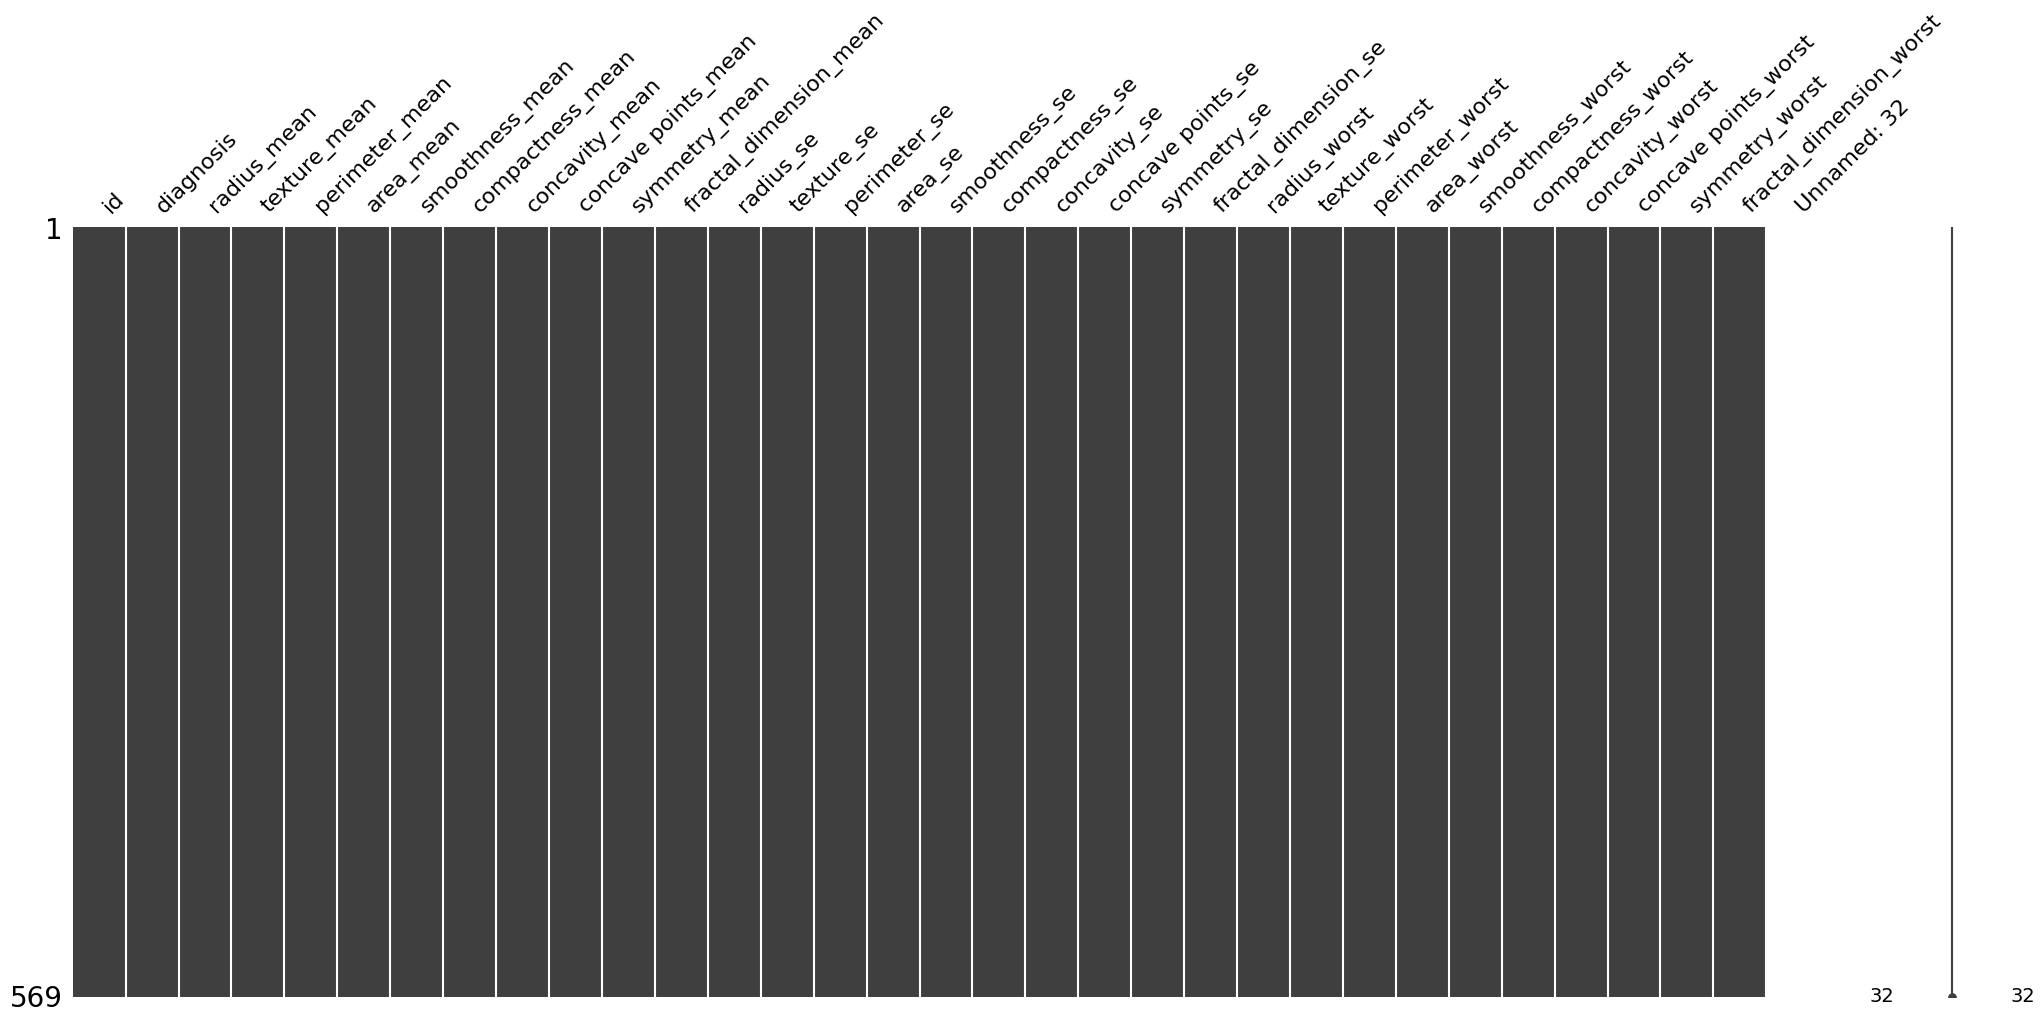

In [60]:
missingno.matrix(df)
# missingno.bar(df)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [62]:
df.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

# Drop columns that aren't useful

In [63]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Removing Rows with Missing Values

In [64]:
# df.dropna(subset=['Glucose','Diastolic_BP'], inplace=True)
# df.isnull().sum()

# Filling Missing Values

## Filling Missing Values for all DataFrame

In [65]:
# Fill with a constant value
# df = df.fillna(0)

# Fill with the mean value
# df = df.fillna(df.mean())

# Fill with the median value
# df = df.fillna(df.median())

# Fill with the most frequent value (mode)
# df = df.apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# Interpolation (linear)
# df = df.interpolate()

## Identify columns with missing values

In [66]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


## Filling Missing Values for each column

In [67]:
# Fill with a constant value
# df[['Serum_Insulin']] = df[['Serum_Insulin']].fillna(0)

# Fill with the mean value
# df[['Marketing Spend']] = df[['Marketing Spend']].fillna(df[['Marketing Spend']].mean())

# Fill with the median value
# df[['Serum_Insulin']] = df[['Serum_Insulin']].fillna(df[['Marketing Spend']].median())

# Fill with the most frequent value (mode)
# df[['Marketing Spend']] = df[['Marketing Spend']].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# Interpolation (linear)
# df[['Marketing Spend']] = df[['Marketing Spend']].interpolate()

# df.head()

## Check the Missing Values

In [68]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Check balance for Output (Classification_train)

In [69]:
y_out = 'diagnosis'
df[y_out].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
# engine-location as variable
engine_loc_counts = df[y_out].value_counts().to_frame()
engine_loc_counts.rename(columns={y_out: 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'name'
engine_loc_counts.head(10)

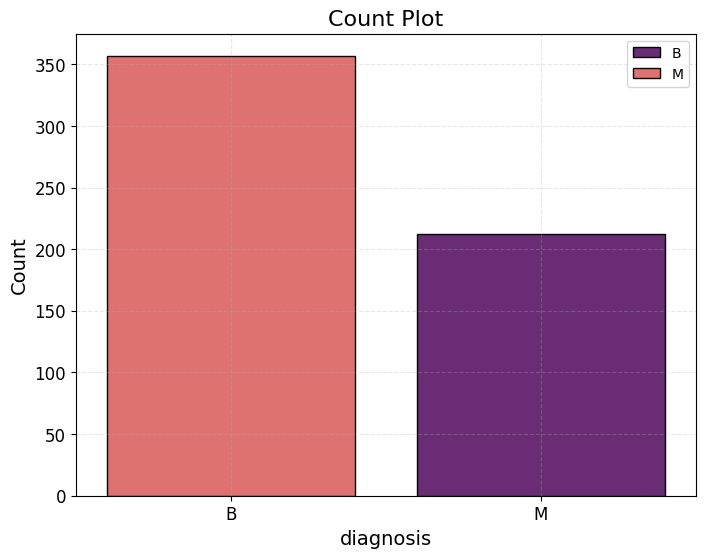

In [70]:
# Seaborn count plot with customizations
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=df, x=y_out, hue=y_out, palette='magma', order=df[y_out].value_counts().index, edgecolor='black', legend=False)
plt.xlabel(y_out, fontsize=14)  # Set x-axis label with font size
plt.ylabel('Count', fontsize=14)  # Set y-axis label with font size
plt.title('Count Plot', fontsize=16)  # Set title with font size
plt.grid(True, linestyle='--', linewidth=0.8, alpha=0.3)  # Add grid lines with custom style
plt.xticks(fontsize=12)  # Set font size for x-axis ticks
plt.yticks(fontsize=12)  # Set font size for y-axis ticks
plt.legend(set(df[y_out]), loc='upper right')  # Add legend
plt.show()

# Correlation Coefficient

In [ ]:
# numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
# for param in numeric_columns:
#     pearson_coef, p_value = stats.pearsonr(df[param], df['price'])
#     print(param)
#     print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value,'\n')

# Groupby and pivot

In [ ]:
# df_group = df[['','','']]

# # grouping results
# df_group_one = df_group.groupby(['',''],as_index=False).mean()
# df_group_one

In [ ]:
# grouped_pivot = df_group_one.pivot(index='',columns='')
# grouped_pivot

In [ ]:
# # pcolor
# fig, ax = plt.subplots()
# im = ax.pcolor(grouped_pivot, cmap='RdBu')

# #label names
# row_labels = grouped_pivot.columns.levels[1]
# col_labels = grouped_pivot.index

# #move ticks and labels to the center
# ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
# ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# #insert labels
# ax.set_xticklabels(row_labels, minor=False)
# ax.set_yticklabels(col_labels, minor=False)

# fig.colorbar(im)

# Visualization

## Heatmap

In [71]:
# without str column in dataset
# correlations=df.corr()
# drop str column to get correlations
correlations=df.drop(['diagnosis'],axis=1).corr()
correlations

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


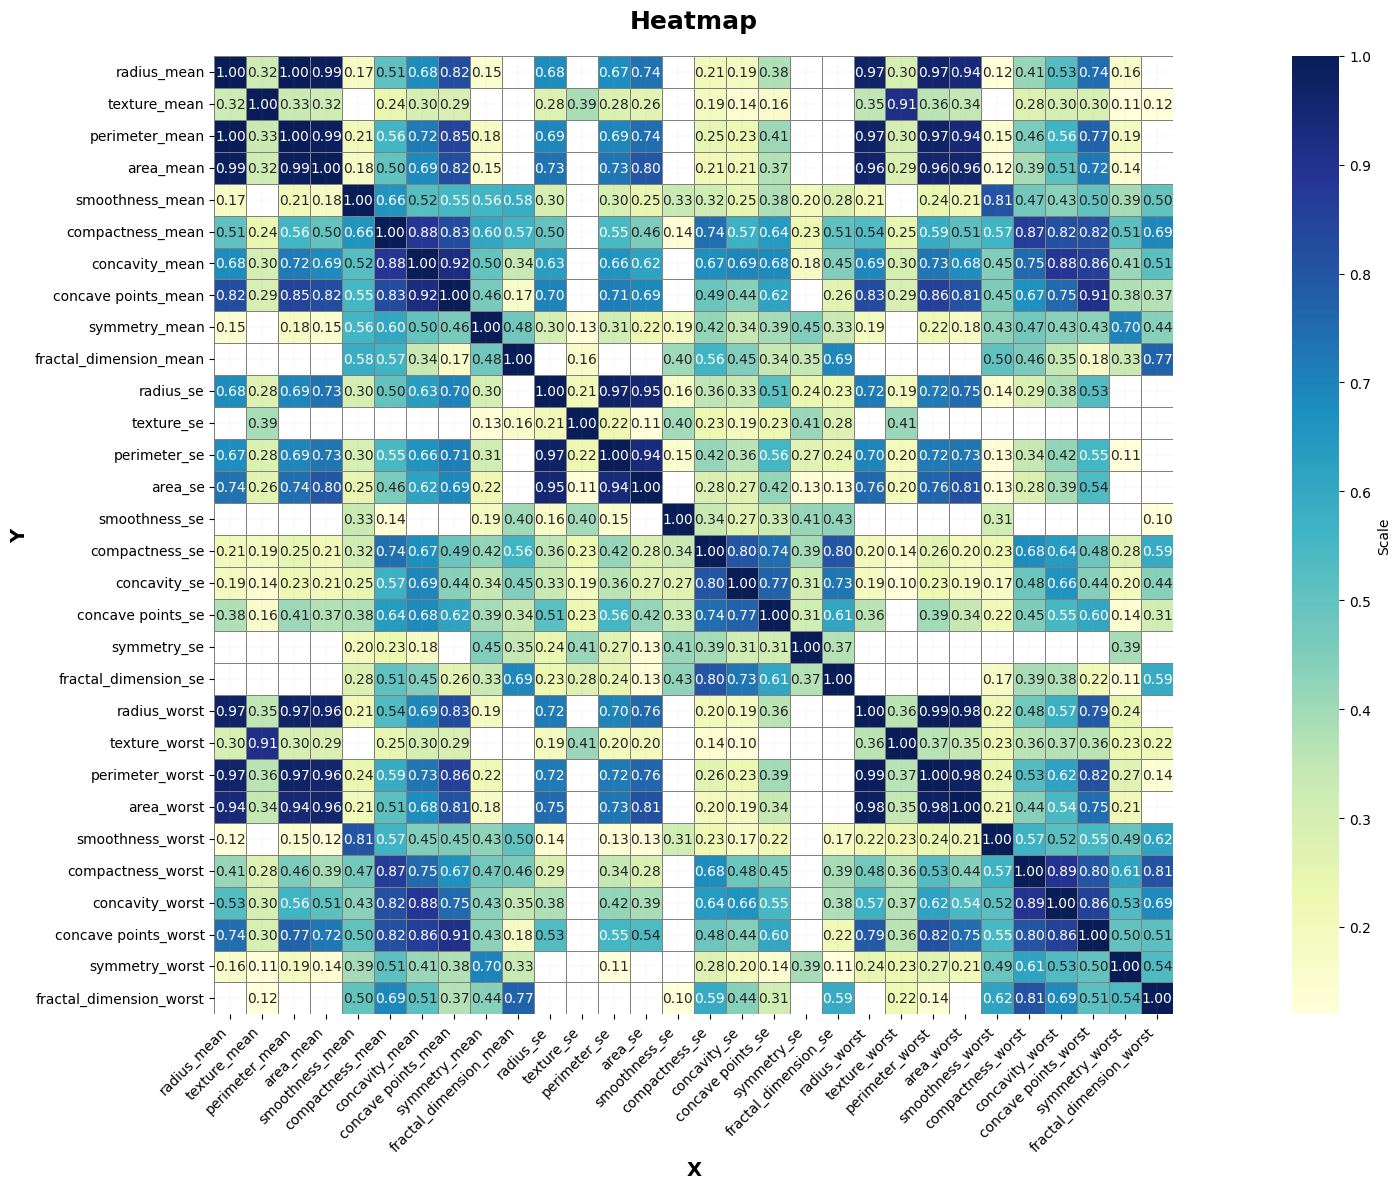

In [72]:
# Create a figure and axis
plt.figure(figsize=(24, 12))

# Create a heatmap with customization
heatmap = sns.heatmap(
    data=correlations,
    annot=True,              # Annotate cells with the data value
    fmt=".2f",               # Format the annotations to 2 decimal places
    cmap="YlGnBu",           # Colormap
    cbar=True,               # Show color bar
    cbar_kws={'label': 'Scale'},  # Color bar customization
    linewidths=0.5,          # Line width between cells
    linecolor='gray',        # Line color between cells
    square=True,             # Force square cells
    mask=correlations<0.1,               # Do not mask any data
    annot_kws={"size": 10},  # Annotation font size
    xticklabels=True,        # Show x-axis labels
    yticklabels=True,        # Show y-axis labels
    robust=True              # Robust colormap limits
)

# Customize the plot
plt.title('Heatmap', fontsize=18, weight='bold', pad=20)
plt.xlabel('X', fontsize=14, weight='bold')
plt.ylabel('Y', fontsize=14, weight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Adjust layout for better fit
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.3)
# Display the heatmap
plt.show()

## Scatter plot

In [73]:
# df.columns.tolist()

In [74]:
# # Create Seaborn scatter plot with customization
# plt.figure(figsize=(10, 6))
# scatter = sns.scatterplot(
#                         data=df, 
#                         x='R&D Spend', 
#                         y='Profit',
#                         hue = 'Profit',
#                         palette='viridis', 
#                         sizes=(20, 500), 
#                         alpha=0.7, 
#                         edgecolor='w', 
#                         linewidth=1.5
# )
# # Customize plot
# plt.title('Scatter Plot')
# plt.xlabel('YearsExperience')
# plt.ylabel('Salary')
# plt.grid(True, linewidth=0.3, alpha=0.3)
# # Add legend

# # Display plot
# plt.show()

## Histogram

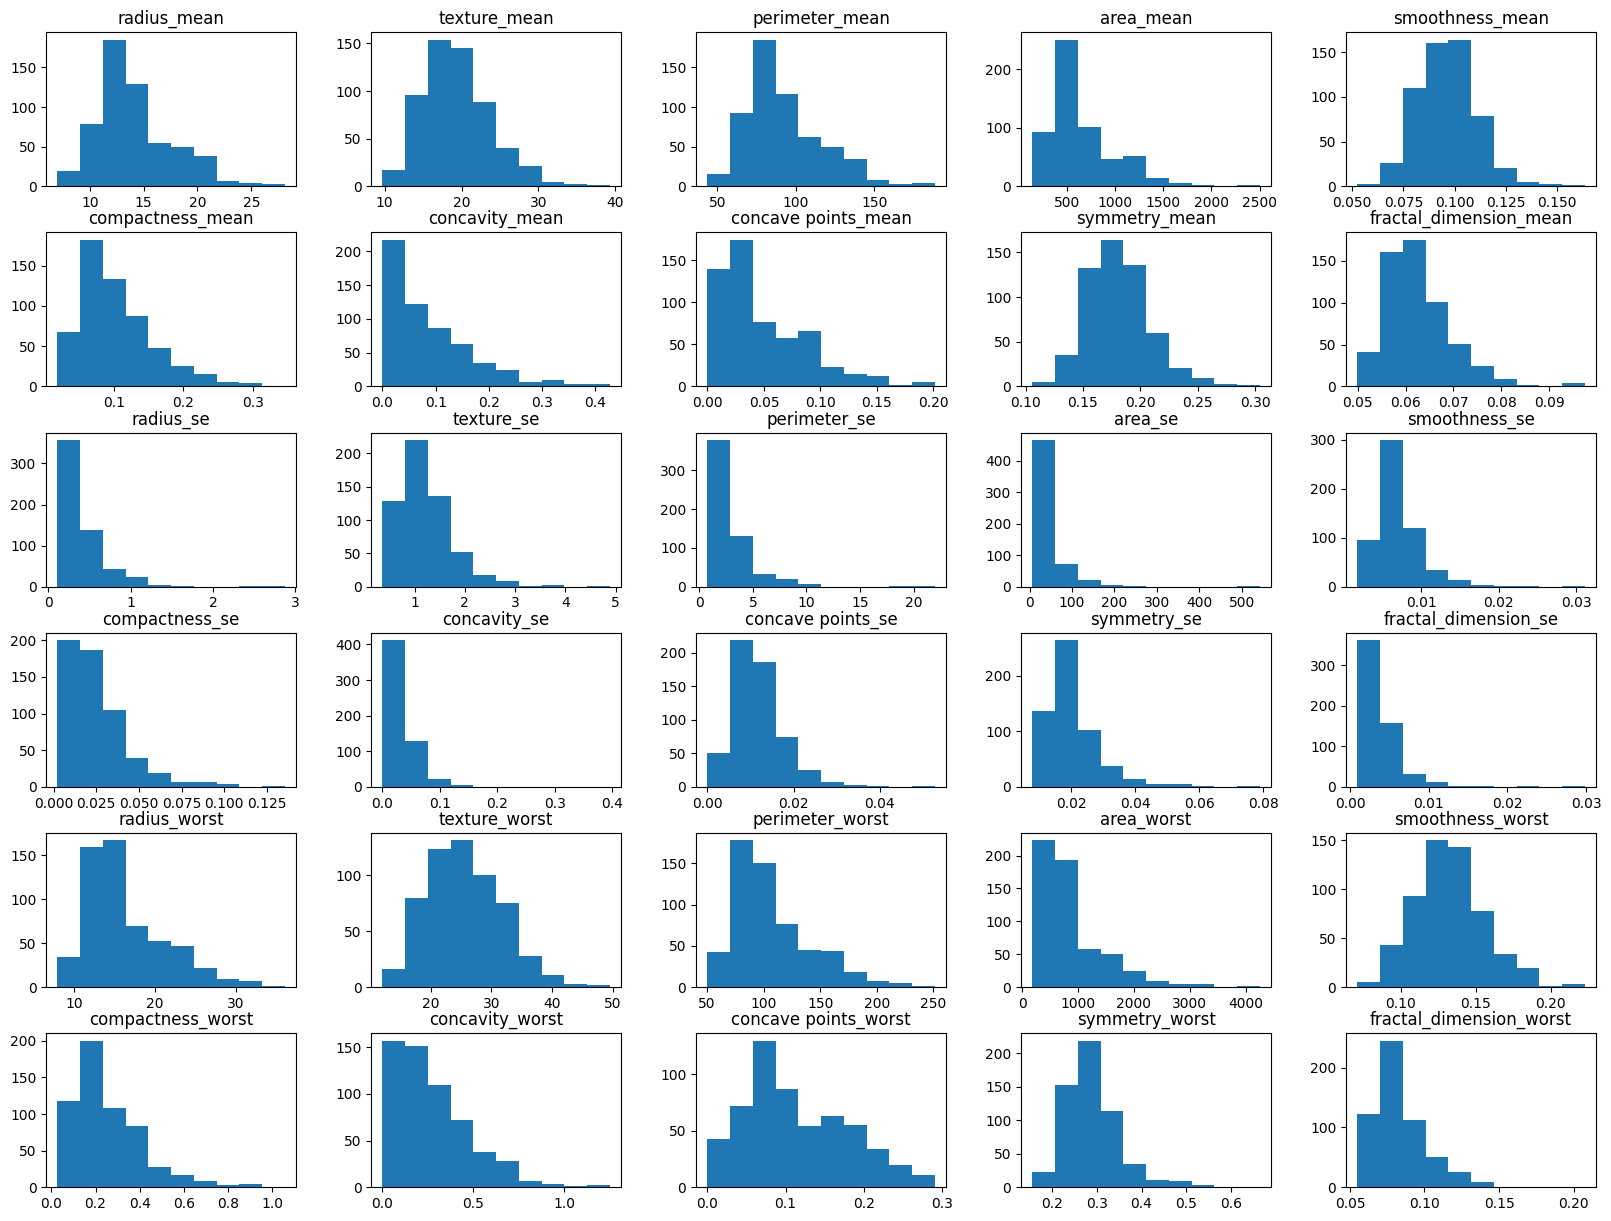

In [75]:
df.hist(figsize=(20,15),grid=False,)
plt.show()

# # or
# fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (8, 6))
# colors = ["#e24a33", "#348abd", "#988ed5", "#777777"] # whatever the colors may be but it should be different for each histogram.
# for index, column in enumerate(correlations.columns):
#     ax = axes.flatten()[index]
#     ax.hist(df[column], color = colors[index], label = column)
#     ax.legend(loc = "best")
# plt.suptitle("Desired Histograms", size = 20)
# plt.show()

## show DataFrame

In [76]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Encoding

## If it have more than two different words

### get_dummies

In [77]:
# dummies = []
# cols = ['diagnosis']
# for col in cols:
#     dummies.append(pd.get_dummies(df[col], drop_first=True, dtype=float))
# titanic_dummies = pd.concat(dummies, axis=1)
# df = pd.concat((df, titanic_dummies), axis=1)
# df.head()

In [78]:
# df=df.drop(cols,axis=1)
# df.head()

### *------------------------------------------------------------------------------------------------------------------*

### LabelEncoder

In [79]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['State'] = le.fit_transform(df['State'])
# df.head()

### If only have two different words.

In [80]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [81]:
df['diagnosis']=[ 1 if i=='M'  else 0  for i in df['diagnosis']]

In [82]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

In [83]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# get X , Y

In [85]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2, random_state=42)

In [87]:
print(x_train.shape)
print(x_test.shape)

(455, 30)
(114, 30)


In [88]:
print(y_train.shape)
print(y_test.shape)

(455,)
(114,)


# Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Train

## Grid Search

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors' : [3,5,7,9,11,13] , 'p' : [1,2] , 'weights': ["uniform", "distance"]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, params, scoring='accuracy', cv=5)  # Set refit=True

# Train the grid search
grid_search.fit(x_train, y_train)  

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [91]:
print("Best Hyperparameter Index:", grid_search.best_index_)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)

Best Hyperparameter Index: 4
Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Cross-Validated Score: 0.9648351648351647


In [92]:
# Get the model with best hyperparameters
model = grid_search.best_estimator_
y_pred = model.predict(x_test)

## Randomized Search

In [93]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RandomizedSearchCV

# params = {'n_neighbors' : [3,5,7,9,11,13] , 'p' : [1,2], 'weights': ["uniform", "distance"]}
# knn = KNeighborsClassifier()

# random_search = RandomizedSearchCV(knn, params, scoring='r2', cv=5, random_state=42)

# # Train the random search
# random_search.fit(x_train, y_train)

In [94]:
# print("Best Hyperparameter Index:", random_search.best_index_)
# print("Best Hyperparameters:", random_search.best_params_)
# print("Best Cross-Validated Score:", random_search.best_score_)

In [95]:
# model = random_search.best_estimator_
# y_pred = model.predict(x_test)

## Train KNeighborsClassifier without search

In [96]:
# from sklearn.neighbors import KNeighborsClassifier
# model=KNeighborsClassifier(n_neighbors = 5, p = 1, )
# model.fit(x_train, y_train)

In [97]:
# y_pred = model.predict(x_test)

# Evaluate model

### confusion_matrix

In [98]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test , y_pred)
confusion

array([[69,  2],
       [ 2, 41]], dtype=int64)

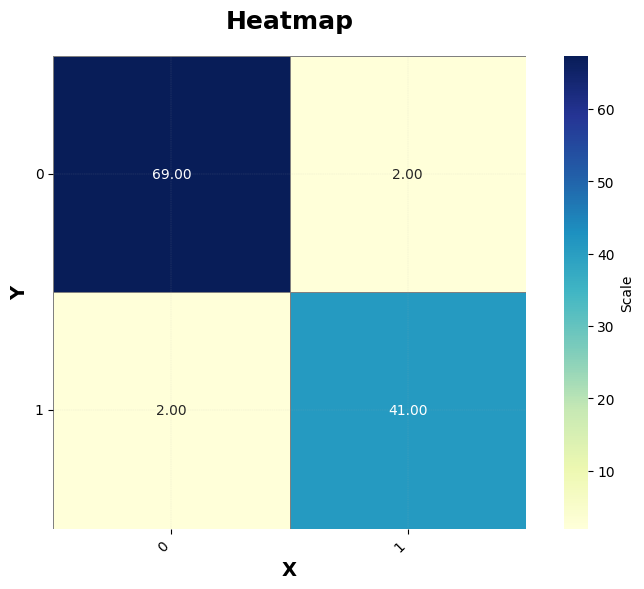

In [99]:
# Create a figure and axis
plt.figure(figsize=(8, 6))

# Create a heatmap with customization
heatmap = sns.heatmap(
    data=confusion,
    annot=True,              # Annotate cells with the data value
    fmt=".2f",               # Format the annotations to 2 decimal places
    cmap="YlGnBu",           # Colormap
    cbar=True,               # Show color bar
    cbar_kws={'label': 'Scale'},  # Color bar customization
    linewidths=0.5,          # Line width between cells
    linecolor='gray',        # Line color between cells
    square=True,             # Force square cells
    mask=confusion<1,               # Do not mask any data
    annot_kws={"size": 10},  # Annotation font size
    xticklabels=True,        # Show x-axis labels
    yticklabels=True,        # Show y-axis labels
    robust=True              # Robust colormap limits
)

# Customize the plot
plt.title('Heatmap', fontsize=18, weight='bold', pad=20)
plt.xlabel('X', fontsize=14, weight='bold')
plt.ylabel('Y', fontsize=14, weight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Adjust layout for better fit
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.3)
# Display the heatmap
plt.show()

### accuracy_score

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9649122807017544

### recall_score

In [101]:
from sklearn.metrics import recall_score
recall_score(y_test , y_pred)

0.9534883720930233

### precision_score

In [102]:
from sklearn.metrics import precision_score
precision_score(y_test , y_pred)

0.9534883720930233

### f1_score

In [103]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9534883720930233

### roc_curve

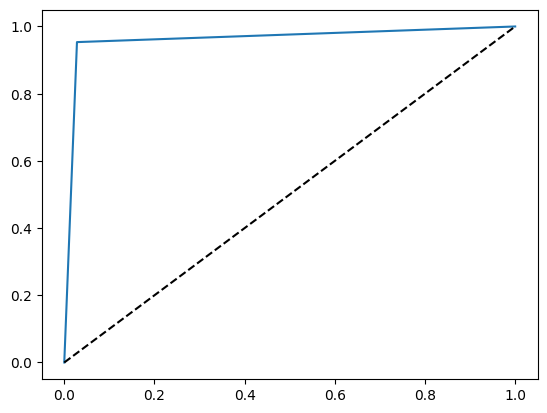

In [104]:
from sklearn.metrics import roc_curve
FPR,TPR,THE=roc_curve(y_test, y_pred)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'k--')

### roc_auc_score

In [105]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9626596790042581